# SIT307 - Data Analysis Project (Assignment 2)

Our chosen dataset is [Life Expectancy (WHO)](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who).

Prepared by

| Student           | Student ID |
|-------------------|------------|
| HOOMAN SHYKHIPOUR | 220060109  |
| SARAH GOSLING     | 220094149  |
| DEVIN JAYASINGHE  | 220228075  |
| RYAN WAITES       | 215127684  |
| ANTHONY GEORGE    | 220180567  |
| MATT KINNIA       | 219311697  |

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt

In [15]:
life_df = pd.read_csv('Raw_Life_Expectancy_Data.csv', delimiter=',')

# Column names & Data types
By Ryan Waites 215127684
##### Aim: Ensure consistency in column names and expected data types.
Whitespaces, typos, common casing and some data type alterations are all that are required here.<br>
Note that the values of Status have been converted from the strings 'Developed' and 'Developing' to 0 and 1 respectively for use in later data analysis.

In [16]:
life_df.columns = life_df.columns.str.strip()
life_df.columns = life_df.columns.str.upper()
life_df.columns = life_df.columns.str.replace(' ', '_')
life_df = life_df.replace({'Developed': 0, 'Developing': 1})
life_df = life_df.rename(columns={'THINNESS__1-19_YEARS': 'THINNESS_10-19_YEARS'})

life_df = life_df.convert_dtypes()

In [17]:
life_df.dtypes

COUNTRY                             string
YEAR                                 Int64
STATUS                               Int64
LIFE_EXPECTANCY                    Float64
ADULT_MORTALITY                      Int64
INFANT_DEATHS                        Int64
ALCOHOL                            Float64
PERCENTAGE_EXPENDITURE             Float64
HEPATITIS_B                          Int64
MEASLES                              Int64
BMI                                Float64
UNDER-FIVE_DEATHS                    Int64
POLIO                                Int64
TOTAL_EXPENDITURE                  Float64
DIPHTHERIA                           Int64
HIV/AIDS                           Float64
GDP                                Float64
POPULATION                         Float64
THINNESS_10-19_YEARS               Float64
THINNESS_5-9_YEARS                 Float64
INCOME_COMPOSITION_OF_RESOURCES    Float64
SCHOOLING                          Float64
dtype: object

In [18]:
life_df

,COUNTRY,YEAR,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_10-19_YEARS,THINNESS_5-9_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,Afghanistan,2015,1,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,1,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,1,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.47,9.9
3,Afghanistan,2012,1,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,1,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,1,44.3,723,27,4.36,0.0,68,31,...,67,7.13,65,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,1,44.5,715,26,4.06,0.0,7,998,...,7,6.52,68,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,1,44.8,73,25,4.43,0.0,73,304,...,73,6.53,71,39.8,57.34834,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,1,45.3,686,25,1.72,0.0,76,529,...,76,6.16,75,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [19]:
# Total null values amongst each column.
print(life_df.isnull().sum())

COUNTRY                              0
YEAR                                 0
STATUS                               0
LIFE_EXPECTANCY                     10
ADULT_MORTALITY                     10
INFANT_DEATHS                        0
ALCOHOL                            194
PERCENTAGE_EXPENDITURE               0
HEPATITIS_B                        553
MEASLES                              0
BMI                                 34
UNDER-FIVE_DEATHS                    0
POLIO                               19
TOTAL_EXPENDITURE                  226
DIPHTHERIA                          19
HIV/AIDS                             0
GDP                                448
POPULATION                         652
THINNESS_10-19_YEARS                34
THINNESS_5-9_YEARS                  34
INCOME_COMPOSITION_OF_RESOURCES    167
SCHOOLING                          163
dtype: int64


# Life Expectancy Column Cleaning
By Anthony George 220180567
##### Aim: Recognise and rectify incorrect 'Life Expectancy' column data
Our team has identified an incorrect data pattern in the *Life Expectancy* column data. <br>
We have astutely observed that zero's are missing in float values, and with it, the decimal point. <br>
The data at first glimpse seemed unnatural, with large variations in life expectancy (many years in some cases). When compared with life expectancy data from the referenced source below, we could see that the datasets were inconsistent with one another. <br>
To rectify the 'zero's missing' value error in this instance, I will develop an algorithm to add a zero and decimal place where needed.<br>

References: <br>
https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/ <br>
https://www.aihw.gov.au/reports/life-expectancy-death/deaths-in-australia/contents/life-expectancy <br>


**First, let's plot the *Life Expectancy* data of each country, so we can visualise the unnatural data**


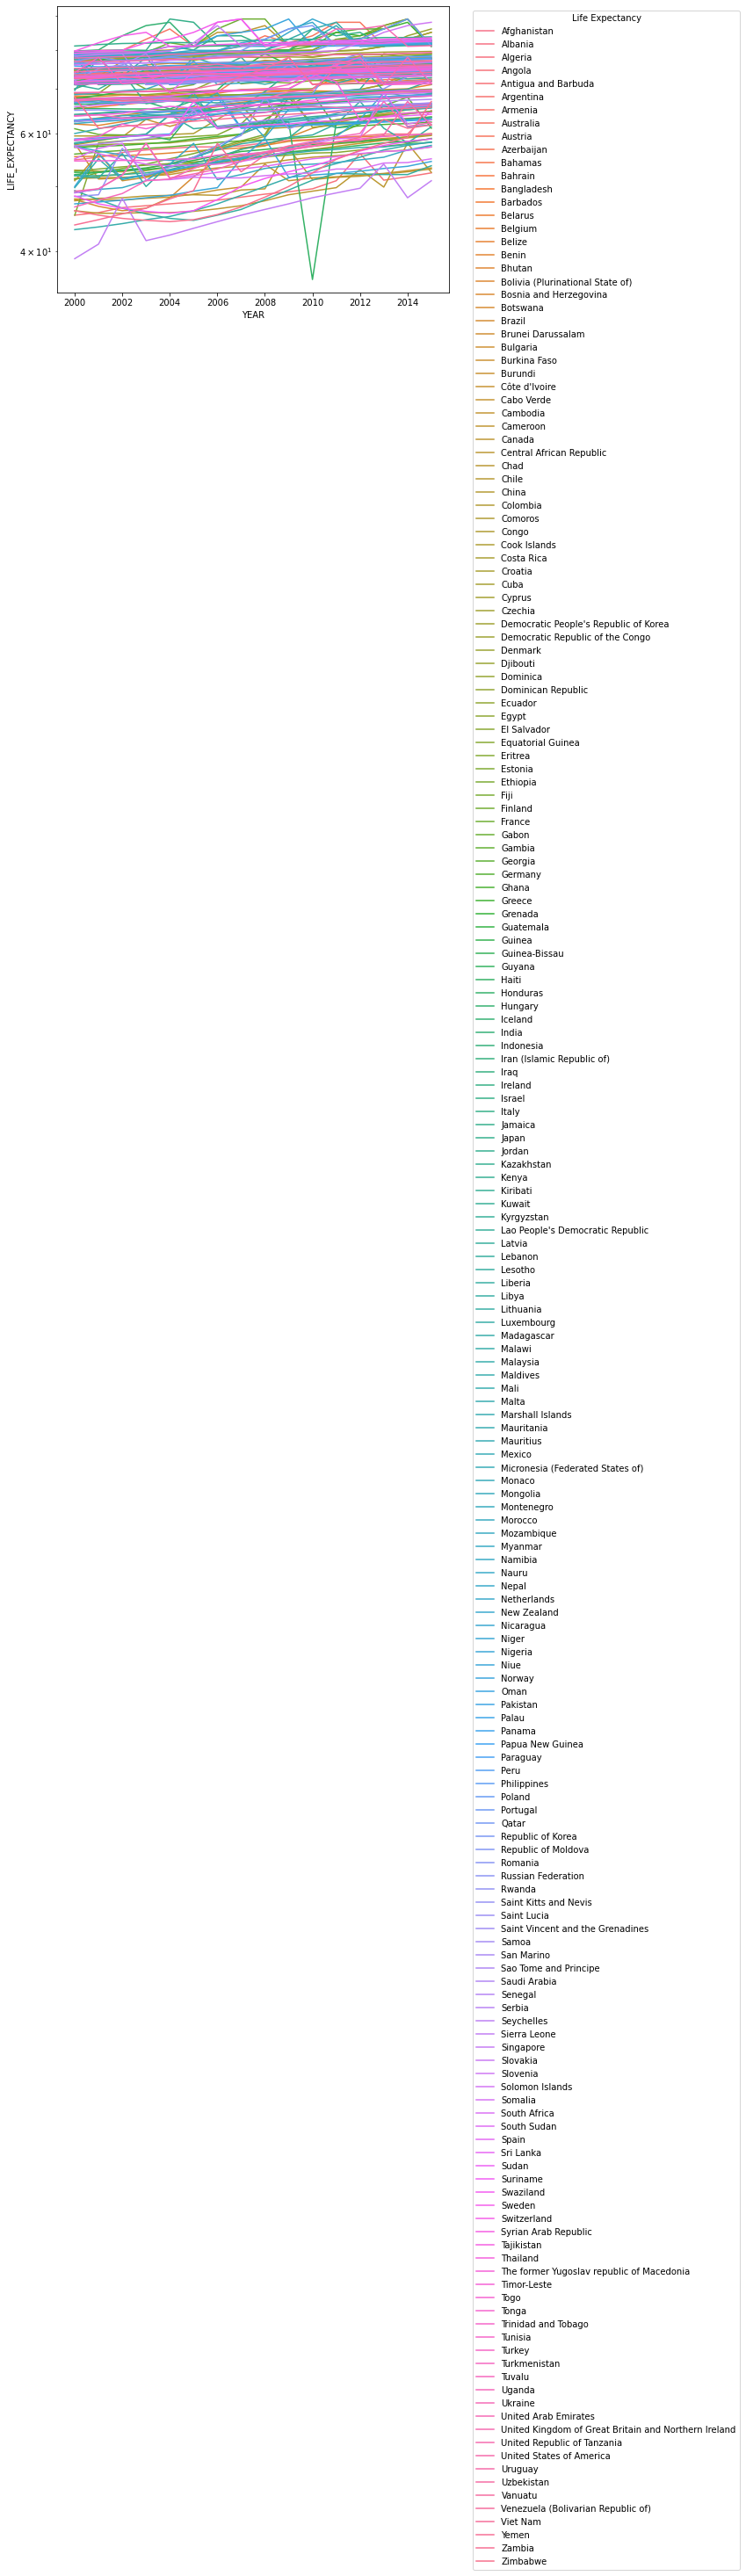

In [22]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='YEAR', y='LIFE_EXPECTANCY', hue='COUNTRY', data=life_df)
plt.yscale('log')
plt.legend(title='Life Expectancy', bbox_to_anchor=(1.05, 1), loc='upper left')

#### We can clearly see one country has false data for Year == 2010, let's find out who that is..

In [24]:
print(life_df[['COUNTRY', 'LIFE_EXPECTANCY']].loc[(life_df['YEAR'] == 2010) & (life_df['LIFE_EXPECTANCY'] < 4*10^2)].to_string(index=False))

COUNTRY  LIFE_EXPECTANCY
  Haiti             36.3


#### Examining other *Life Expectancy* data for Haiti, we can see what the value should (approximately) be. So let's fix it

In [25]:
# Haiti has an unusual deformity in Life Expectancy data for 2010.
# Manually force this to be he average of 2009 & 2011 values.
life_df['LIFE_EXPECTANCY'].loc[(life_df['YEAR'] == 2010) & (life_df['COUNTRY'] == 'Haiti')] = 62.4 

#### Now to create an algorithm to find large differences in *Life Expectancy* values between years, and fix them by adding the missing zero and decimal place.

In [ ]:
print('\nCompensated values:\n')
ctry = ''
alpha = 0.9
# Iterate over all rows in dataset
for index, row in life_df.iterrows():
    # validate this row has data
    if row['Country'] != '' and pd.notnull(row['Life Expectancy']):
        # store current country
        if ctry != row['Country']:
            ctry = row['Country']
            flag = False
        # if a new country
        if flag == False:
            # iterate over all rows again
            for i in life_df.index:
                # but only do this for country 
                if life_df['Country'][i] == ctry:
                    flag = True
                    if i != life_df.index[-1] and life_df['Country'][i] == life_df['Country'][i + 1]:
                        if life_df['Life Expectancy'][i + 1] - life_df['Life Expectancy'][i] > alpha:
                            row = life_df['Life Expectancy'][i + 1] / 10
                            row = str(row)
                            num, dec = row.split('.')
                            num = num[:1] + '0' + num[1:]
                            num = num + '.' + dec
                            num = float(num)
                            # update Total Expenditure column with updated values
                            life_df['Life Expectancy'][i + 1] = num
                            print(i, ctry, life_df['Life Expectancy'][i + 1])

#### Visualising *Life Expectancy* once again to see a much more natural plot 


In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Year', y='Life Expectancy', hue='Country', data=life_df)
plt.yscale('log')
plt.legend(title='Life Expectancy', bbox_to_anchor=(1.05, 1), loc='upper left')

# Total Expenditure Cleaning
By Anthony George 220180567
##### Aim: Complete the Total Expenditure column dataset without applying bias
The cleaning of *Total Expenditure* column data is two-fold. <br>
 1. Zero's missing, causing values of '10' to be values of '1', biasing the data terribly. <br>
 2. Values for *Year = 2015* are missing throughout this dataset column<br>

To correct the 'zero's missing' value error, I will develop an algorithm to add a zero where needed.<br>
To correct the *Year* value error, since the percentage of missing data is low,  we can use the **imputation method** to complete the dataset of this column. 
We do this by taking an average of all *Total Expenditure* values for each *Country* over all other *Years*, and populate the empty field with that value. This way, the missing data can be predicted based on the complete observed data.
The imputation method implies the development of reasonable guesses for missing data.  If the portion of missing data is too high, which in this case it is not, the results lack natural variation that could result in an effective model.

Reference: https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/

**First, let's check which countries have a *Total Expenditure* of greater than zero for the year 2015**

In [7]:
print("\nThe following countries have a Total Expenditure > 0:\n")
print(life_df['COUNTRY'].loc[(life_df['YEAR'] == 2015) & (life_df['TOTAL_EXPENDITURE'] > 0)].to_string(index=False))


The following countries have a Total Expenditure > 0:

Afghanistan
    Albania


#### Only two countries!
#### This means that all countries (excluding Afghanistan and Albania) have a Total Expenditure null value for Year = 2015 
Assessing the missing values, we can check the number of unique countries against the number of countries that have a 'Year' column value of '2015'

In [8]:
print("All Unique Countries: ", life_df['COUNTRY'].nunique())
print("Countries when Year=2015:", len(life_df.loc[life_df['YEAR'] == 2015]))

All Unique Countries:  193
Countries when Year=2015: 183


From these results, we can see there are 10 countries that do NOT contain data for the year 2015.
We should check the rest of the data of these countries to assess their validity 

In [9]:
# the first 'Year' entry for each country should be '2015', so let's check that.
country = ''
country_list = []
for index, row in life_df.iterrows():
    if country != row['COUNTRY']:
        country = row['COUNTRY']
        if row['YEAR'] == 2015:
            continue
        else:
            country_list.append(row)

print("\nThe following countries do not have data for any 'Year' other than '2013'\n")
df = pd.DataFrame(country_list)
df


The following countries do not have data for any 'Year' other than '2013'



,COUNTRY,YEAR,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_10-19_YEARS,THINNESS_5-9_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
624,Cook Islands,2013,1,<NA>,<NA>,0,0.01,0.000000,98,0,...,98,3.58,98,0.1,<NA>,<NA>,0.1,0.1,<NA>,<NA>
769,Dominica,2013,1,<NA>,<NA>,0,0.01,11.419555,96,0,...,96,5.58,96,0.1,722.75665,<NA>,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,1,<NA>,<NA>,0,0.01,871.878317,8,0,...,79,17.24,79,0.1,3617.752354,<NA>,0.1,0.1,<NA>,0.0
1715,Monaco,2013,1,<NA>,<NA>,0,0.01,0.000000,99,0,...,99,4.30,99,0.1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1812,Nauru,2013,1,<NA>,<NA>,0,0.01,15.606596,87,0,...,87,4.65,87,0.1,136.18321,<NA>,0.1,0.1,<NA>,9.6
1909,Niue,2013,1,<NA>,<NA>,0,0.01,0.000000,99,0,...,99,7.20,99,0.1,<NA>,<NA>,0.1,0.1,<NA>,<NA>
1958,Palau,2013,1,<NA>,<NA>,0,<NA>,344.690631,99,0,...,99,9.27,99,0.1,1932.12237,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,1,<NA>,<NA>,0,8.54,0.000000,97,0,...,96,6.14,96,0.1,<NA>,<NA>,3.7,3.6,0.749,13.4
2216,San Marino,2013,1,<NA>,<NA>,0,0.01,0.000000,69,0,...,69,6.50,69,0.1,<NA>,<NA>,<NA>,<NA>,<NA>,15.1
2713,Tuvalu,2013,1,<NA>,<NA>,0,0.01,78.281203,9,0,...,9,16.61,9,0.1,3542.13589,1819.0,0.2,0.1,<NA>,0.0


As we can see above, these 10 countries have some data populated for the *Year* 2013 only, with the zero data *Life Expectancy*. Since this column is crucial to the remainder of our analysis, **the removal of these entries from the dataset merits justification.**

In [10]:
# Drop the above rows from the dataset
for index, row in df.iterrows():
    life_df.drop(index, inplace=True)

life_df

,COUNTRY,YEAR,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_10-19_YEARS,THINNESS_5-9_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,Afghanistan,2015,1,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,1,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,1,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.47,9.9
3,Afghanistan,2012,1,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,1,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,1,44.3,723,27,4.36,0.0,68,31,...,67,7.13,65,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,1,44.5,715,26,4.06,0.0,7,998,...,7,6.52,68,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,1,44.8,73,25,4.43,0.0,73,304,...,73,6.53,71,39.8,57.34834,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,1,45.3,686,25,1.72,0.0,76,529,...,76,6.16,75,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


**Now we have a slightly cleaner dataset, we can check the exact number of rows we need to update with our coming algorithm**

In [11]:
print('Number of rows that require updating:', 
      len(life_df.loc[(life_df['YEAR'] == 2015) & (life_df['TOTAL_EXPENDITURE'].isnull())]),'\n') 

print(life_df[['COUNTRY', 'YEAR', 'TOTAL_EXPENDITURE']].loc
      [
    (life_df['YEAR'] == 2015) & 
    (life_df['TOTAL_EXPENDITURE'].isnull())
      ])

Number of rows that require updating: 181 

                                 COUNTRY  YEAR  TOTAL_EXPENDITURE
32                               Algeria  2015               <NA>
48                                Angola  2015               <NA>
64                   Antigua and Barbuda  2015               <NA>
80                             Argentina  2015               <NA>
96                               Armenia  2015               <NA>
...                                  ...   ...                ...
2858  Venezuela (Bolivarian Republic of)  2015               <NA>
2874                            Viet Nam  2015               <NA>
2890                               Yemen  2015               <NA>
2906                              Zambia  2015               <NA>
2922                            Zimbabwe  2015               <NA>

[181 rows x 3 columns]


**Algorithm to find and correct 'missing zeros' values that should be ten's, but are one's**

In [12]:
print('\nCompensated values:\n')
ctry = ''
for index, row in life_df.iterrows():
    if country != '' and pd.notnull(row['TOTAL_EXPENDITURE']):
        if ctry != row['COUNTRY']:
            ctry = row['COUNTRY']
            flag = False
        if row['TOTAL_EXPENDITURE'] > 9 and flag == False:
            for i in life_df.index:
                if life_df['COUNTRY'][i] == ctry:
                    flag = True
                    if pd.notnull(life_df['TOTAL_EXPENDITURE'][i]):
                        row = str(life_df['TOTAL_EXPENDITURE'][i])
                        num, dec = row.split('.')
                        if int(num) == 1:
                            num = num[:1] + '0' + num[1:]
                            num = num + '.' + dec
                            num = float(num)
                            
                            # update Total Expenditure column with updated values
                            life_df['TOTAL_EXPENDITURE'][i] = num
                            print(i, ctry, life_df['TOTAL_EXPENDITURE'][i])



Compensated values:

132 Austria 10.94
135 Austria 10.6
136 Austria 10.4
137 Austria 10.35
138 Austria 10.53
139 Austria 10.56
140 Austria 10.48
141 Austria 10.27
142 Austria 10.12
143 Austria 10.6
241 Belgium 10.59
242 Belgium 10.57
243 Belgium 10.54
244 Belgium 10.42
245 Belgium 10.17
246 Belgium 10.39
424 Burundi 10.3
497 Canada 10.45
498 Canada 10.67
499 Canada 10.78
500 Canada 10.82
503 Canada 10.3
661 Cuba 10.6
662 Cuba 10.19
664 Cuba 10.79
665 Cuba 10.42
738 Denmark 10.8
740 Denmark 10.98
741 Denmark 10.87
744 Denmark 10.18
754 Djibouti 10.57
937 France 10.57
938 France 10.45
939 France 10.53
940 France 10.6
941 France 10.53
942 France 10.43
943 France 10.22
983 Georgia 10.5
984 Georgia 10.19
997 Germany 10.99
998 Germany 10.93
1001 Germany 10.39
1002 Germany 10.18
1003 Germany 10.34
1004 Germany 10.52
1005 Germany 10.37
1006 Germany 10.62
1007 Germany 10.4
1008 Germany 10.15
1009 Germany 10.1
1126 Haiti 10.41
1182 Iceland 10.7
1315 Japan 10.23
1316 Japan 10.25
1317 Japan 10.17

**Now that we have the correct values in place, aggregation can be done to calculate a value to populate the *Total Expenditure* field of each *Country* for *Year* == 2015**

In [13]:
print('Average of all ')
country = ''
total = []
percentages = {}
for index, row in life_df.iterrows():
    if country != row['COUNTRY']:
        if country != '' and len(total)>0:
            average = mean(total)
            percentages[country] = round(average, 2)
        country = row['COUNTRY']
        total = []
    if row['YEAR'] == 2015:
        continue
    else:
        if pd.notnull(row['TOTAL_EXPENDITURE']):
            total.append(row['TOTAL_EXPENDITURE'])
    if index == life_df.index[-1]:
        average = mean(total)
        percentages[country] = round(average, 2)

for i in percentages:
    print(i, percentages[i])

Average of all 
Afghanistan 8.26
Albania 5.94
Algeria 4.6
Angola 3.92
Antigua and Barbuda 4.79
Argentina 6.91
Armenia 4.86
Australia 8.84
Austria 10.72
Azerbaijan 5.68
Bahamas 6.71
Bahrain 3.81
Bangladesh 2.85
Barbados 6.12
Belarus 6.19
Belgium 9.56
Belize 5.04
Benin 4.64
Bhutan 5.35
Bolivia (Plurinational State of) 5.63
Bosnia and Herzegovina 8.74
Botswana 5.51
Brazil 8.02
Brunei Darussalam 2.82
Bulgaria 7.24
Burkina Faso 6.04
Burundi 7.69
Côte d'Ivoire 5.72
Cabo Verde 4.76
Cambodia 5.74
Cameroon 4.72
Canada 10.05
Central African Republic 4.04
Chad 4.38
Chile 6.91
China 4.92
Colombia 6.34
Comoros 4.83
Congo 2.99
Costa Rica 8.62
Croatia 7.37
Cuba 8.83
Cyprus 6.76
Czechia 7.05
Democratic Republic of the Congo 3.56
Denmark 10.22
Djibouti 7.67
Dominican Republic 4.68
Ecuador 5.88
Egypt 5.35
El Salvador 7.1
Equatorial Guinea 2.93
Eritrea 3.47
Estonia 5.69
Ethiopia 4.9
Fiji 3.9
Finland 8.61
France 10.76
Gabon 3.18
Gambia 5.31
Georgia 8.53
Germany 10.67
Ghana 4.33
Greece 9.04
Grenada 6.19
Gu

Comparing the result of the aggregation with known results, we see that this imputation to derive the missing values for this column is actually quite accurate.<br><br>
We can see the aggregation has calculated Afghanistan has a Total Percentage for Year 2015 of 8.26 <br>
Compared with Afghanistan's actual Total Percentage for Year 2015 is 8.16 <br>
Similarly, Albania's actual = 6.0 vs the calcualted 5.94 <br>
Pretty accurate!<br>
Let's update the dataset

In [14]:
for i in percentages:     
    life_df.loc[(life_df['COUNTRY'] == i) & (life_df['YEAR'] == 2015), 'TOTAL_EXPENDITURE'] = percentages[i]
    #print(life_df.loc[(life_df['Country'] == i) & (life_df['Year'] == 2015)])
life_df.loc[life_df['YEAR'] == 2015]

,COUNTRY,YEAR,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_10-19_YEARS,THINNESS_5-9_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,Afghanistan,2015,1,65.0,263,62,0.01,71.279624,65,1154,...,6,8.26,65,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,1,77.8,74,0,4.6,364.975229,99,0,...,99,5.94,99,0.1,3954.22783,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,1,75.6,19,21,<NA>,0.0,95,63,...,95,4.6,95,0.1,4132.76292,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,1,52.4,335,66,<NA>,0.0,64,118,...,7,3.92,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,1,76.4,13,0,<NA>,0.0,99,0,...,86,4.79,99,0.2,13566.9541,<NA>,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,1,74.1,157,9,<NA>,0.0,87,0,...,87,5.0,87,0.1,<NA>,<NA>,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,1,76.0,127,28,<NA>,0.0,97,256,...,97,5.98,97,0.1,<NA>,<NA>,14.2,14.5,0.678,12.6
2890,Yemen,2015,1,65.7,224,37,<NA>,0.0,69,468,...,63,5.01,69,0.1,<NA>,<NA>,13.6,13.4,0.499,9.0
2906,Zambia,2015,1,61.8,33,27,<NA>,0.0,9,9,...,9,5.82,9,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


# Alcohol Cleaning
By Hooman Shykhipour 220060109
##### Aim: Complete the Alcohol column dataset (N/A removal)
Values for *Year = 2015* are missing throughout this dataset column<br>

In [15]:
print("\nThese countries have Alcohol consumption values in 2015 (not N/A):\n")
print(life_df['COUNTRY'].loc[(life_df['YEAR'] == 2015) & (life_df['ALCOHOL'] > 0)].to_string(index=False))


These countries have Alcohol consumption values in 2015 (not N/A):

                                       Afghanistan
                                           Albania
                                       New Zealand
                                            Norway
                                         Singapore
United Kingdom of Great Britain and Northern Ir...


In [16]:
#find the average of alcohol consumption for each country

country = ''
total = []
averageAlcohol = {}
for index, row in life_df.iterrows():
    if country != row['COUNTRY']:
        if country != '' and len(total)>0:
            average = mean(total)
            averageAlcohol[country] = round(average, 2)
        country = row['COUNTRY']
        total = []
    if row['YEAR'] == 2015:
        continue
    else:
        if pd.notnull(row['ALCOHOL']):
            total.append(row['ALCOHOL'])
    if index == life_df.index[-1]:
        average = mean(total)
        averageAlcohol[country] = round(average, 2)
for i in averageAlcohol:
    print(i, averageAlcohol[i])

Afghanistan 0.01
Albania 4.87
Algeria 0.41
Angola 5.74
Antigua and Barbuda 7.95
Argentina 7.97
Armenia 3.7
Australia 10.16
Austria 12.24
Azerbaijan 0.99
Bahamas 10.27
Bahrain 1.93
Bangladesh 0.01
Barbados 8.21
Belarus 13.5
Belgium 11.04
Belize 6.25
Benin 1.0
Bhutan 0.28
Bolivia (Plurinational State of) 3.21
Bosnia and Herzegovina 4.41
Botswana 4.67
Brazil 7.21
Brunei Darussalam 0.38
Bulgaria 10.87
Burkina Faso 4.24
Burundi 4.1
Côte d'Ivoire 2.84
Cabo Verde 3.45
Cambodia 1.49
Cameroon 4.14
Canada 8.05
Central African Republic 1.23
Chad 0.41
Chile 6.98
China 4.18
Colombia 4.42
Comoros 0.13
Congo 2.17
Costa Rica 3.92
Croatia 12.45
Cuba 4.19
Cyprus 10.26
Czechia 13.03
Democratic People's Republic of Korea 3.0
Democratic Republic of the Congo 1.42
Denmark 10.71
Djibouti 0.76
Dominican Republic 6.03
Ecuador 3.81
Egypt 0.19
El Salvador 2.69
Equatorial Guinea 7.34
Eritrea 0.61
Estonia 9.01
Ethiopia 1.07
Fiji 1.46
Finland 9.55
France 12.4
Gabon 7.88
Gambia 2.13
Georgia 5.62
Germany 11.63
Ghana 

In [17]:
# insert average of alcohol consumption for year 2015 which are N/A
for i in averageAlcohol:
    life_df.loc[(life_df['COUNTRY'] == i) & (life_df['YEAR'] == 2015) , 'ALCOHOL'] = averageAlcohol[i]
# Montenegro does not have alcohol consumption for year 2005, below line insert avarage of Montengro for 2005
    life_df.loc[(life_df['COUNTRY'] == 'Montenegro') & (life_df['YEAR'] == 2005) , 'ALCOHOL'] = averageAlcohol[i]

life_df.loc[life_df['YEAR'] == 2015]

,COUNTRY,YEAR,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_10-19_YEARS,THINNESS_5-9_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,Afghanistan,2015,1,65.0,263,62,0.01,71.279624,65,1154,...,6,8.26,65,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,1,77.8,74,0,4.87,364.975229,99,0,...,99,5.94,99,0.1,3954.22783,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,1,75.6,19,21,0.41,0.0,95,63,...,95,4.6,95,0.1,4132.76292,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,1,52.4,335,66,5.74,0.0,64,118,...,7,3.92,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,1,76.4,13,0,7.95,0.0,99,0,...,86,4.79,99,0.2,13566.9541,<NA>,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,1,74.1,157,9,7.42,0.0,87,0,...,87,5.0,87,0.1,<NA>,<NA>,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,1,76.0,127,28,3.09,0.0,97,256,...,97,5.98,97,0.1,<NA>,<NA>,14.2,14.5,0.678,12.6
2890,Yemen,2015,1,65.7,224,37,0.05,0.0,69,468,...,63,5.01,69,0.1,<NA>,<NA>,13.6,13.4,0.499,9.0
2906,Zambia,2015,1,61.8,33,27,2.24,0.0,9,9,...,9,5.82,9,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [18]:
print(life_df.isnull().sum())

COUNTRY                              0
YEAR                                 0
STATUS                               0
LIFE_EXPECTANCY                      0
ADULT_MORTALITY                      0
INFANT_DEATHS                        0
ALCOHOL                             16
PERCENTAGE_EXPENDITURE               0
HEPATITIS_B                        553
MEASLES                              0
BMI                                 32
UNDER-FIVE_DEATHS                    0
POLIO                               19
TOTAL_EXPENDITURE                   47
DIPHTHERIA                          19
HIV/AIDS                             0
GDP                                443
POPULATION                         644
THINNESS_10-19_YEARS                32
THINNESS_5-9_YEARS                  32
INCOME_COMPOSITION_OF_RESOURCES    160
SCHOOLING                          160
dtype: int64


## Result:
Missing values for alcohol consuption reduced to 16 (initially was 194). These 16 missing values are all for **South Sudan** which does not have any alcohol consumption data for any year.<br>

     


# Adult Mortality Cleaning
By Hooman Shykhipour 220060109
##### Aim: Complete the Adult Mortality column dataset (add zeros)
Values for *Adult Mortality* have missing zeros throughout this dataset column<br>
First I will calculate mortality mean for all countries, then I will check if any value length is lower than mean length, I will pad zeros accordingly<br>

In [19]:
#save the dataframe before cleaning, so I can compare it with new dataframe after cleaning
before_Adult_Mortality_cleaning= life_df.copy()

In [20]:
#find the average of Adult Mortality for each country

country = ''
total = []
averageAdultMortality = {}
for index, row in life_df.iterrows():
    if country != row['COUNTRY']:
        if country != '' and len(total)>0:
            average = mean(total)
            averageAdultMortality[country] = int(average)
        country = row['COUNTRY']
        total = []
    total.append(row['ADULT_MORTALITY'])
    if index == life_df.index[-1]:
        average = mean(total)
        averageAdultMortality[country] = int(average)
for i in averageAdultMortality:
    print(i, averageAdultMortality[i])

Afghanistan 269
Albania 45
Algeria 108
Angola 328
Antigua and Barbuda 127
Argentina 106
Armenia 117
Australia 63
Austria 65
Azerbaijan 115
Bahamas 152
Bahrain 65
Bangladesh 141
Barbados 77
Belarus 218
Belgium 70
Belize 155
Benin 269
Bhutan 230
Bolivia (Plurinational State of) 177
Bosnia and Herzegovina 64
Botswana 448
Brazil 150
Brunei Darussalam 67
Bulgaria 125
Burkina Faso 252
Burundi 291
Côte d'Ivoire 417
Cabo Verde 116
Cambodia 196
Cameroon 294
Canada 64
Central African Republic 333
Chad 227
Chile 63
China 73
Colombia 124
Comoros 240
Congo 322
Costa Rica 69
Croatia 89
Cuba 57
Cyprus 54
Czechia 71
Democratic People's Republic of Korea 160
Democratic Republic of the Congo 265
Denmark 66
Djibouti 274
Dominican Republic 143
Ecuador 132
Egypt 170
El Salvador 155
Equatorial Guinea 279
Eritrea 308
Estonia 169
Ethiopia 285
Fiji 125
Finland 68
France 73
Gabon 220
Gambia 249
Georgia 114
Germany 71
Ghana 180
Greece 73
Grenada 153
Guatemala 131
Guinea 259
Guinea-Bissau 158
Guyana 203
Haiti 168

In [21]:
# add zeros to right side of Adult Mortality
for index, row in life_df.iterrows():
  
    while((len(str(life_df.at[index, 'ADULT_MORTALITY']))< len(str(averageAdultMortality[row['COUNTRY']])))):
        life_df.at[index, 'ADULT_MORTALITY'] = 10*life_df.at[index, 'ADULT_MORTALITY']

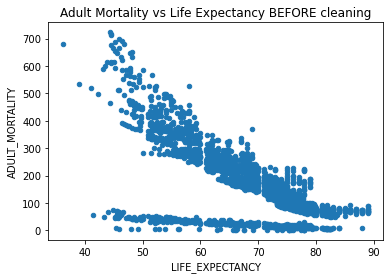

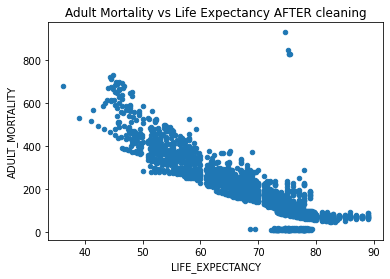

In [22]:
ax2 = before_Adult_Mortality_cleaning.plot.scatter(x='LIFE_EXPECTANCY', y='ADULT_MORTALITY',title='Adult Mortality vs Life Expectancy BEFORE cleaning')
ax1 = life_df.plot.scatter(x='LIFE_EXPECTANCY', y='ADULT_MORTALITY',title='Adult Mortality vs Life Expectancy AFTER cleaning')

## Result:
As can be seen from above scatter plots,many Adult Mortality outliers are rectified,and new values match the overal adult mortality for each country.<br>

     

# Polio, Diphtheria & Hepatitis B Cleaning
By Sarah Gosling 220094149

#### Aim: Complete cleansing the Polio, Diptheria & Hepatitis B column dataset without applying bias

There are two issues with the data in these columns, missing values and single integer outliers. I identified this by graphing the data in scatter plots, making it very clear there were quite a few single digit outliers. To remedy these issues I filled the null values using Pandas interpolate(linear) method which fills the entries with like data. I then found all the single digit entries, set them to NaN and then used interpolate(linear) to fill these with like data.

#### First Step: Filling nulls for each column and plot results showing the single digit outliers.

List of columns and their null count


COUNTRY                              0
YEAR                                 0
STATUS                               0
LIFE_EXPECTANCY                      0
ADULT_MORTALITY                      0
INFANT_DEATHS                        0
ALCOHOL                             16
PERCENTAGE_EXPENDITURE               0
HEPATITIS_B                        553
MEASLES                              0
BMI                                 32
UNDER-FIVE_DEATHS                    0
POLIO                                0
TOTAL_EXPENDITURE                   47
DIPHTHERIA                           0
HIV/AIDS                             0
GDP                                443
POPULATION                         644
THINNESS_10-19_YEARS                32
THINNESS_5-9_YEARS                  32
INCOME_COMPOSITION_OF_RESOURCES    160
SCHOOLING                          160
dtype: int64


Scatterplots showing single digit outliers.


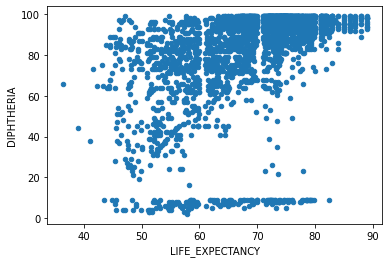

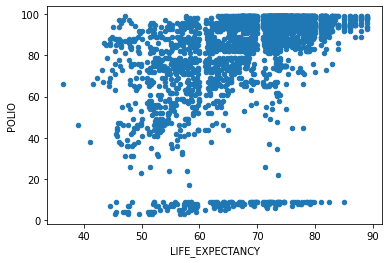

In [23]:
# Convert types to float to be able to use interpolate() function.
life_df['DIPHTHERIA'] = life_df['DIPHTHERIA'].astype(float)
life_df['POLIO'] = life_df['POLIO'].astype(float)
life_df['LIFE_EXPECTANCY'] = life_df['LIFE_EXPECTANCY'].astype(float)

# Use interpolate function to fill in NaN entries with like data.
life_df['LIFE_EXPECTANCY'] = life_df['LIFE_EXPECTANCY'].interpolate(method ='linear', limit_direction='forward', axis=0)
life_df['DIPHTHERIA'] = life_df['DIPHTHERIA'].interpolate(method ='linear', limit_direction='forward', axis=0)
life_df['POLIO'] = life_df['POLIO'].interpolate(method ='linear', limit_direction='forward', axis=0)

print("List of columns and their null count")
print("\n")
print(life_df.isnull().sum())
print("\n")
print("Scatterplots showing single digit outliers.")

# Scatterplots showing the single digit outliers for each column.
ax = life_df.plot.scatter(x='LIFE_EXPECTANCY', y='DIPHTHERIA')
ax = life_df.plot.scatter(x='LIFE_EXPECTANCY', y='POLIO')

#### Second Step: Editing the single digit outliers to be similar to like entries.

List of columns and their null count


COUNTRY                              0
YEAR                                 0
STATUS                               0
LIFE_EXPECTANCY                      0
ADULT_MORTALITY                      0
INFANT_DEATHS                        0
ALCOHOL                             16
PERCENTAGE_EXPENDITURE               0
HEPATITIS_B                        553
MEASLES                              0
BMI                                 32
UNDER-FIVE_DEATHS                    0
POLIO                                0
TOTAL_EXPENDITURE                   47
DIPHTHERIA                           0
HIV/AIDS                             0
GDP                                443
POPULATION                         644
THINNESS_10-19_YEARS                32
THINNESS_5-9_YEARS                  32
INCOME_COMPOSITION_OF_RESOURCES    160
SCHOOLING                          160
dtype: int64


Scatterplots showing rectified outliers.


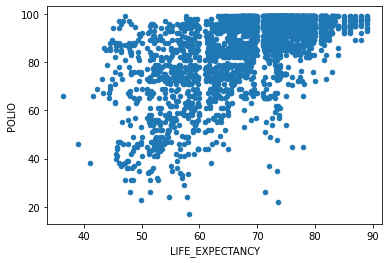

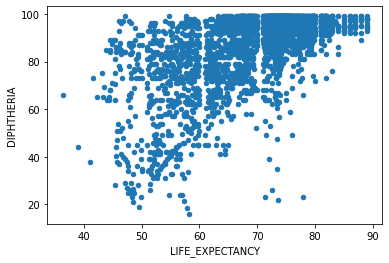

In [24]:
# Change the type to string.
life_df['POLIO'] = life_df['POLIO'].astype(str)
life_df['DIPHTHERIA'] = life_df['DIPHTHERIA'].astype(str)

# Go through and find the single digit entries and change them to NaN.
for value in life_df['POLIO']:
    value = str(value)
    if (len(value) == 3):
        life_df.loc[life_df['POLIO'] == value, 'POLIO'] = np.NaN
        
for value in life_df['DIPHTHERIA']:
    value = str(value)
    if (len(value) == 3):
        life_df.loc[life_df['DIPHTHERIA'] == value, 'DIPHTHERIA'] = np.NaN
    
# Change data type back to float.
life_df['POLIO'] = life_df['POLIO'].astype(float)
life_df['DIPHTHERIA'] = life_df['DIPHTHERIA'].astype(float)

# Use interpolate() function to fill the NaN entries with like data. Direction forwards/backwards to get 1st and last entries.
life_df['POLIO'] = life_df['POLIO'].interpolate(method ='linear', limit_direction='forward', axis=0)
life_df['POLIO'] = life_df['POLIO'].interpolate(method ='linear', limit_direction='backward', axis=0)

life_df['DIPHTHERIA'] = life_df['DIPHTHERIA'].interpolate(method ='linear', limit_direction='forward', axis=0)
life_df['DIPHTHERIA'] = life_df['DIPHTHERIA'].interpolate(method ='linear', limit_direction='backward', axis=0)

print("List of columns and their null count")
print("\n")
print(life_df.isnull().sum())
print("\n")
print("Scatterplots showing rectified outliers.")

# Plot the results of cleaned columns.
ax = life_df.plot.scatter(x='LIFE_EXPECTANCY', y='POLIO')
ax = life_df.plot.scatter(x='LIFE_EXPECTANCY', y='DIPHTHERIA')

# BMI Cleaning
By Sarah Gosling 220094149

#### Aim: Complete cleansing the BMI column dataset without applying bias

Similar to Polio & Diphtheria we have identified that this column is missing zeroes so we need to fill these values with correct data. We also have total data missing for South Sudan and Sudan, so will be excluding these in this cleaning. These are the only NaN values in this column.

Scatterplotbefore cleaning.


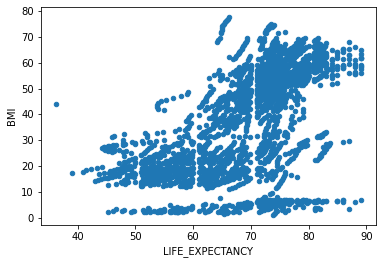

In [25]:
print("Scatterplotbefore cleaning.")

# Bmi scatterplot before cleaning.
life_df['BMI'] = life_df['BMI'].astype(float)
ax = life_df.plot.scatter(x='LIFE_EXPECTANCY', y='BMI')

List of columns and their null count


COUNTRY                              0
YEAR                                 0
STATUS                               0
LIFE_EXPECTANCY                      0
ADULT_MORTALITY                      0
INFANT_DEATHS                        0
ALCOHOL                             16
PERCENTAGE_EXPENDITURE               0
HEPATITIS_B                        553
MEASLES                              0
BMI                                 32
UNDER-FIVE_DEATHS                    0
POLIO                                0
TOTAL_EXPENDITURE                   47
DIPHTHERIA                           0
HIV/AIDS                             0
GDP                                443
POPULATION                         644
THINNESS_10-19_YEARS                32
THINNESS_5-9_YEARS                  32
INCOME_COMPOSITION_OF_RESOURCES    160
SCHOOLING                          160
dtype: int64


Scatterplots showing rectified outliers.


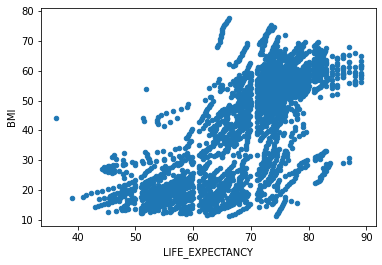

In [26]:
# Change the type to string.
life_df['BMI'] = life_df['BMI'].astype(str)

# Go through and find the single digit entries and change them to NaN.
for value in life_df['BMI']:
    value = str(value)
    if (len(value) == 3):
        life_df.loc[life_df['BMI'] == value, 'BMI'] = np.NaN

# Change data type back to float.
life_df['BMI'] = life_df['BMI'].astype(float)

# Use interpolate() function to fill the NaN entries with like data. Direction forwards/backwards to get 1st and last entries.
life_df['BMI'] = life_df['BMI'].interpolate(method ='linear', limit_direction='forward', axis=0)
life_df['BMI'] = life_df['BMI'].interpolate(method ='linear', limit_direction='backward', axis=0)

# Returning South Sudan and Sudan values back to NaN.
life_df.loc[(life_df['COUNTRY'] == 'South Sudan'), 'BMI'] = np.NaN
life_df.loc[(life_df['COUNTRY'] == 'Sudan'), 'BMI'] = np.NaN

print("List of columns and their null count")
print("\n")
print(life_df.isnull().sum())
print("\n")
print("Scatterplots showing rectified outliers.")

# Plot the results of cleaned columns.
ax = life_df.plot.scatter(x='LIFE_EXPECTANCY', y='BMI')

# Measles Cleaning
By Ryan Waites 215127684

#### Aim: Addressing the following issues with Measles data.

Continuing on from previous cleaning tasks, the Measles data as shown below has had the following issues identified:
- Total Countries with any 0 values for measles cases: 133
    - Developing: 105 Developed: 28

- Total Countries with half or more of their entries as 0 for measles cases: 57
    - Developing: 50 Developed: 7<br><br>
    
- The description provided with this dataset for the Measles data states it represents cases per 1000 population
    - 525 entries greater than 1000, I was unable to identify any clear data entry mistakes like added 0’s, etc. that previous cleaning efforts have accounted for.

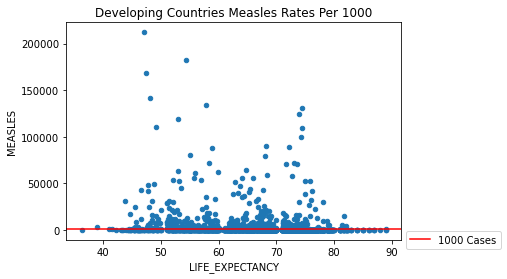

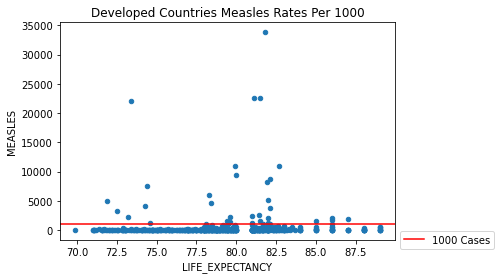

In [27]:
# Developing Countries Measles Rates Per 1000.
ax = life_df.loc[life_df['STATUS'] == 1].plot.scatter(x='LIFE_EXPECTANCY', y='MEASLES', 
                                                      title='Developing Countries Measles Rates Per 1000')
ax.axhline(y = 1000, color = 'r', label='1000 Cases')
ax.legend(bbox_to_anchor = (1, 0), loc = 'center left')

# Developed Countries Measles Rates Per 1000.
ax = life_df.loc[life_df['STATUS'] == 0].plot.scatter(x='LIFE_EXPECTANCY', y='MEASLES', 
                                                      title='Developed Countries Measles Rates Per 1000')
ax.axhline(y = 1000, color = 'r', label='1000 Cases')
ax.legend(bbox_to_anchor = (1, 0), loc = 'center left')

(0.0, 1000.0)

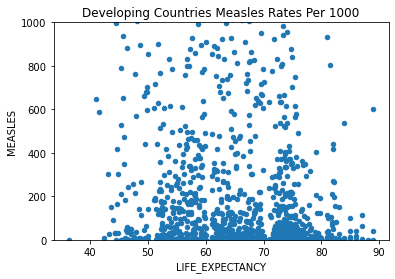

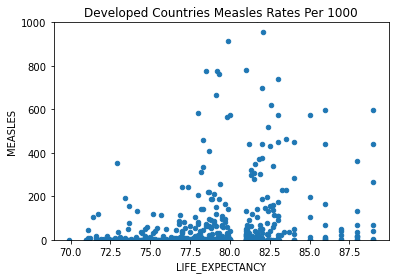

In [28]:
# Developing Countries Measles Rates Per 1000 (1000 Case cutoff).
ax = life_df.loc[life_df['STATUS'] == 1].plot.scatter(x='LIFE_EXPECTANCY', y='MEASLES', 
                                                      title='Developing Countries Measles Rates Per 1000')
ax.set_ylim((0,1000))

# Developed Countries Measles Rates Per 1000 (1000 Case cutoff).
ax = life_df.loc[life_df['STATUS'] == 0].plot.scatter(x='LIFE_EXPECTANCY', y='MEASLES', 
                                                      title='Developed Countries Measles Rates Per 1000')
ax.set_ylim((0,1000))

#### Scatterplots indicate far greater likelihood of total cases per country/year rather than per 1000.
Getting a clearer overview of the data, a mistake in the description for the data resolves many issues with the high case numbers present in the data and can also be crosschecked with alternate datasets/data descriptions for confirmation. <br><br>

Next we want to identify countries that have values of 0 for measles cases, particularly those with more than half their countries entries as 0.

In [29]:
# Countries with measles entries of 0.
zero_measles = life_df[['COUNTRY', 'STATUS', 'MEASLES']].loc[life_df['MEASLES'] == 0]
zero_measles_count = zero_measles.groupby(['COUNTRY', 'STATUS']).agg({'MEASLES': ['count'] }).reset_index()
zero_measles_count.columns = zero_measles_count.columns.map(''.join)
zero_measles_count.rename(columns={'MEASLEScount': 'MEASLES_0_COUNT'}, inplace=True)

# Entry count/years of data per Country
country_years = life_df.groupby(['COUNTRY']).agg({ 'COUNTRY': ['count']}).reset_index()
country_years.columns = country_years.columns.map(''.join)

# Combine country entries count with measles count for 0 values.
countries = zero_measles_count['COUNTRY'].tolist()

for index, row in country_years.iterrows():
    if row['COUNTRY'] not in countries:
        country_years.drop(index, axis=0)

zero_measles_count['TOTAL_ENTRIES'] = country_years['COUNTRYcount']

# Identify countries with at least half their entries being a value of 0.
least_measles = zero_measles_count.loc[
    zero_measles_count['MEASLES_0_COUNT'].astype(float) / zero_measles_count['TOTAL_ENTRIES'].astype(float) >= .5
    ]

In [30]:
print('Total Countries with any 0 values for measles cases:', len(zero_measles_count))
print('Developing:', zero_measles_count['STATUS'].agg('sum'), 'Developed:', 
      zero_measles_count['STATUS'].agg('count') - zero_measles_count['STATUS'].agg('sum'))

print('\nTotal Countries with half or more of their entries as 0 for measles cases:', len(least_measles))
least_measles
print('Developing:', least_measles['STATUS'].agg('sum'), 'Developed:', 
      least_measles['STATUS'].agg('count') - least_measles['STATUS'].agg('sum'))

least_measles

Total Countries with any 0 values for measles cases: 133
Developing: 105 Developed: 28

Total Countries with half or more of their entries as 0 for measles cases: 57
Developing: 50 Developed: 7


,COUNTRY,STATUS,MEASLES_0_COUNT,TOTAL_ENTRIES
2,Antigua and Barbuda,1,16,16
3,Argentina,1,10,16
8,Bahamas,1,16,16
10,Barbados,1,16,16
13,Belize,1,16,16
15,Bolivia (Plurinational State of),1,15,16
22,Cabo Verde,1,15,16
24,Chile,1,12,16
25,Colombia,1,9,16
26,Comoros,1,11,16


#### The vast majority of countries reporting no Measles cases tend to be from the developing world

This poses the question of the validity of the Measles data given greater difficulty in detection and reporting leading to false case numbers.

# Life Expectancy Cleaning
By Ryan Waites 215127684

#### Aim: Detect, remove and replace any clear outliers 

Issues can be seen with several entries suffering from unexpected/unrealistic large increases or decreases in life expectancy from one year to the next. Looking at the descriptive statistics for life expectancy by country, we can already see Haiti as an example of this with its lowest value of 36.3.

In [31]:
means = life_df.groupby('COUNTRY')['LIFE_EXPECTANCY'].describe()
means.sort_values(by=['std'])

,count,mean,std,min,25%,50%,75%,max
COUNTRY,,,,,,,,
Seychelles,16.0,72.37500,0.394124,71.8,72.100,72.20,72.625,73.2
Guyana,16.0,65.63750,0.408044,65.0,65.300,65.65,65.925,66.3
Kuwait,16.0,73.84375,0.495269,73.2,73.475,73.75,74.225,74.7
Venezuela (Bolivarian Republic of),16.0,73.38750,0.523927,72.4,73.175,73.60,73.725,74.1
Tonga,16.0,72.53125,0.558234,71.6,72.150,72.50,72.925,73.5
...,...,...,...,...,...,...,...,...
Rwanda,16.0,59.31250,6.372009,48.3,54.825,60.30,64.750,68.0
Haiti,16.0,59.86875,6.566046,36.3,59.200,61.95,62.550,65.0
Zambia,16.0,53.90625,6.667880,43.8,47.525,56.55,58.450,63.0


Using Tukey's rules we can identify outliers using the IQR. However this doesn't account for abrupt changes between years that are significant and abnormal when compared to the changes between other years rather than the list of values as a whole.

In [32]:
Q1 = life_df.groupby('COUNTRY')['LIFE_EXPECTANCY'].quantile(0.25)
Q3 = life_df.groupby('COUNTRY')['LIFE_EXPECTANCY'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
upp_lim = Q3 + 1.5 * IQR

In [33]:
for index, row in life_df.iterrows():
    if row['LIFE_EXPECTANCY'] > upp_lim[row['COUNTRY']] or row['LIFE_EXPECTANCY'] < low_lim[row['COUNTRY']]:
        print(row['COUNTRY'] , row['LIFE_EXPECTANCY'], upp_lim[row['COUNTRY']], low_lim[row['COUNTRY']])

        life_df['LIFE_EXPECTANCY'][index] = np.NaN
        print(life_df['COUNTRY'][index], life_df['LIFE_EXPECTANCY'][index])

Afghanistan 65.0 62.80000000000002 53.399999999999984
Afghanistan nan
Australia 86.0 84.64999999999998 79.05000000000001
Australia nan
Austria 88.0 87.48750000000001 74.1875
Austria nan
Austria 88.0 87.48750000000001 74.1875
Austria nan
Bangladesh 77.0 76.98749999999998 61.2875
Bangladesh nan
Belgium 89.0 85.92499999999998 74.32500000000002
Belgium nan
Belgium 87.0 85.92499999999998 74.32500000000002
Belgium nan
Bolivia (Plurinational State of) 77.0 76.13750000000002 58.237499999999976
Bolivia (Plurinational State of) nan
Cabo Verde 77.0 74.0875 70.7875
Cabo Verde nan
Cabo Verde 69.9 74.0875 70.7875


C:\Users\Ryan\AppData\Local\Temp\ipykernel_10840\1966034590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_df['LIFE_EXPECTANCY'][index] = np.NaN


Cabo Verde nan
Canada 87.0 85.2375 76.7375
Canada nan
Central African Republic 58.0 55.78749999999999 39.88750000000001
Central African Republic nan
Chile 85.0 82.60000000000002 75.19999999999999
Chile nan
Chile 83.0 82.60000000000002 75.19999999999999
Chile nan
Cyprus 85.0 81.57500000000003 76.77499999999996
Cyprus nan
Cyprus 83.0 81.57500000000003 76.77499999999996
Cyprus nan
Democratic People's Republic of Korea 76.0 71.26249999999999 66.5625
Democratic People's Republic of Korea nan
Democratic People's Republic of Korea 73.0 71.26249999999999 66.5625
Democratic People's Republic of Korea nan
Democratic People's Republic of Korea 65.4 71.26249999999999 66.5625
Democratic People's Republic of Korea nan
Denmark 86.0 83.03750000000002 74.33749999999998
Denmark nan
Denmark 84.0 83.03750000000002 74.33749999999998
Denmark nan
Djibouti 69.0 68.7 51.7
Djibouti nan
Dominican Republic 69.3 75.53750000000002 69.63749999999999
Dominican Republic nan
Ecuador 72.8 76.84999999999997 72.8500000000

In [34]:
life_df.loc[life_df['COUNTRY'] == 'Germany']

,COUNTRY,YEAR,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_10-19_YEARS,THINNESS_5-9_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
994,Germany,2015,0,81.0,68,2,11.63,0.0,88,2464,...,94.0,10.67,95.0,0.1,41176.88158,81686611.0,1.1,1.1,0.924,17.1
995,Germany,2014,0,NaN,69,2,11.03,941.756291,88,443,...,94.0,11.3,95.0,0.1,4792.65288,89825.0,1.1,1.1,0.92,17.0
996,Germany,2013,0,86.0,71,2,10.94,895.87795,88,1771,...,94.0,11.16,95.0,0.1,4653.91143,864565.0,1.1,1.1,0.919,16.9
997,Germany,2012,0,86.0,71,2,11.18,839.91332,88,166,...,94.0,10.99,95.0,0.1,4465.24891,8425823.0,1.1,1.1,0.916,16.9
998,Germany,2011,0,85.0,74,2,11.2,869.790735,88,1607,...,94.0,10.93,95.0,0.1,4681.32796,8274983.0,1.1,1.1,0.912,16.8
999,Germany,2010,0,81.0,76,2,11.2,7584.078579,88,780,...,94.0,11.25,95.0,0.1,41785.55691,8177693.0,1.1,1.1,0.907,16.7
1000,Germany,2009,0,80.0,79,2,11.22,7641.270645,88,574,...,95.0,11.4,96.0,0.1,41732.7725,819237.0,1.1,1.1,0.906,16.7
1001,Germany,2008,0,79.9,80,2,11.36,8285.264655,87,917,...,95.0,10.39,96.0,0.1,45699.19832,821197.0,1.1,1.1,0.903,16.6
1002,Germany,2007,0,79.8,82,3,11.5,7777.556353,86,567,...,95.0,10.18,96.0,0.1,41814.8191,82266372.0,1.1,1.1,0.898,16.6
1003,Germany,2006,0,79.6,84,3,11.76,6407.535954,87,2307,...,94.0,10.34,96.0,0.1,36447.87232,82376451.0,1.1,1.1,0.892,16.5


In [35]:
# 91 outliers detected and set to NaN.
life_df.isnull().sum()

COUNTRY                              0
YEAR                                 0
STATUS                               0
LIFE_EXPECTANCY                     91
ADULT_MORTALITY                      0
INFANT_DEATHS                        0
ALCOHOL                             16
PERCENTAGE_EXPENDITURE               0
HEPATITIS_B                        553
MEASLES                              0
BMI                                 32
UNDER-FIVE_DEATHS                    0
POLIO                                0
TOTAL_EXPENDITURE                   47
DIPHTHERIA                           0
HIV/AIDS                             0
GDP                                443
POPULATION                         644
THINNESS_10-19_YEARS                32
THINNESS_5-9_YEARS                  32
INCOME_COMPOSITION_OF_RESOURCES    160
SCHOOLING                          160
dtype: int64